In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta
from tqdm import tqdm, trange
import os
import pickle as pkl
from sklearn.cluster import KMeans
from utils import *

In [2]:
def plot_inertia(clusters):
    fig, ax = plt.subplots(1,2,figsize=(20, 6))
    sns.scatterplot(x=list(range(1, max_k+1)), y=clusters, ax=ax[0])
    ax[0].set_title('Inertia vs K', fontsize=14)
    ax[0].set_xlabel('K = Number of Clusters', fontsize=14)
    ax[0].set_ylabel('Inertia', fontsize=14)
    ax[0].grid()
    plt.tick_params(labelsize=14)

    shift = clusters[1:].copy()
    shift.append(clusters[-1])
    sns.scatterplot(x=list(range(1, max_k+1)), y=np.array(clusters)-np.array(shift), ax=ax[1])
    ax[1].set_title('Derivative of Inertia WRT K', fontsize=14)
    ax[1].set_xlabel('K = Number of Clusters', fontsize=14)
    ax[1].set_ylabel('Change in Inertia', fontsize=14)
    ax[1].grid()
    plt.tick_params(labelsize=14)
    plt.show()

# Load Data

In [3]:
with open('./data/outputs/paid_demand_dict.pkl', 'rb') as f:
    paid_demand_dict = pkl.load(f)
    
with open('./data/outputs/txns_corr_dict.pkl', 'rb') as f:
    txns_corr_dict = pkl.load(f)
    
with open('./data/outputs/occ_dict.pkl', 'rb') as f:
    occ_dict = pkl.load(f)
    
with open('./data/outputs/occ_corr_dict.pkl', 'rb') as f:
    occ_corr_dict = pkl.load(f)

In [4]:
max_k = 35
num_clusters = 31
all_ekeys = list(set(txns_corr_dict.keys()).union(set(occ_corr_dict.keys())))

# Paid Demand Correlation Clustering

1613it [00:00, 3119.60it/s]
100%|███████████████████████████████████████████| 35/35 [00:21<00:00,  1.64it/s]


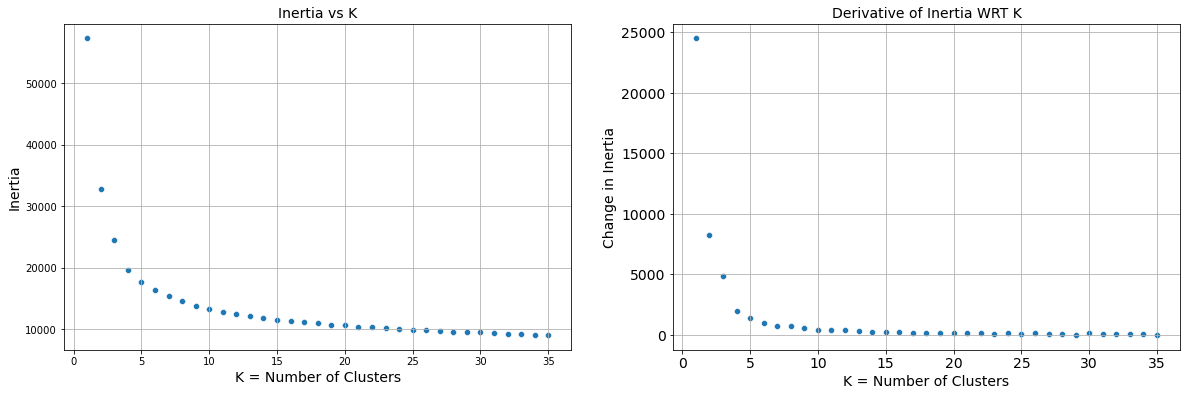

In [5]:
elementkeys = list(txns_corr_dict.keys())
pd_corr_matrix = np.zeros((len(elementkeys),len(elementkeys)))
for i,ekey1 in tqdm(enumerate(elementkeys)):
    for j,ekey2 in enumerate(elementkeys):
        pd_corr_matrix[i,j] = txns_corr_dict[ekey1][ekey2][0]
        
inertia_pd_corr = []

for i in trange(1, max_k+1):
    km_pd_corr = KMeans(n_clusters=i).fit(pd_corr_matrix)
    inertia_pd_corr.append(km_pd_corr.inertia_)
    
plot_inertia(inertia_pd_corr)

km_pd_corr = KMeans(n_clusters=num_clusters).fit(pd_corr_matrix)
pd_corr_clust_dict = {}
for i,ekey in enumerate(elementkeys):
    pd_corr_clust_dict[ekey] = km_pd_corr.labels_[i]

# Occupancy Correlation Clustering

1300it [00:00, 4187.91it/s]
100%|███████████████████████████████████████████| 35/35 [00:09<00:00,  3.57it/s]


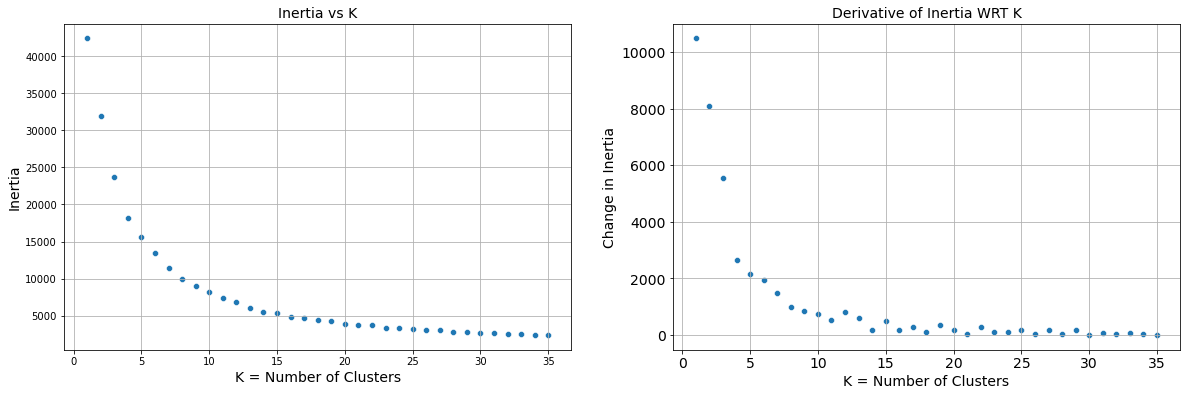

In [6]:
elementkeys = list(occ_corr_dict.keys())
occ_corr_matrix = np.zeros((len(elementkeys),len(elementkeys)))
for i,ekey1 in tqdm(enumerate(elementkeys)):
    for j,ekey2 in enumerate(elementkeys):
        occ_corr_matrix[i,j] = occ_corr_dict[ekey1][ekey2][0]
        
inertia_occ_corr = []

for i in trange(1, max_k+1):
    km_occ_corr = KMeans(n_clusters=i).fit(occ_corr_matrix)
    inertia_occ_corr.append(km_occ_corr.inertia_)
    
plot_inertia(inertia_occ_corr)

km_occ_corr = KMeans(n_clusters=num_clusters).fit(occ_corr_matrix)
occ_corr_clust_dict = {}
for i,ekey in enumerate(elementkeys):
    occ_corr_clust_dict[ekey] = km_occ_corr.labels_[i]

# Paid Demand Clustering

100%|███████████████████████████████████████████| 35/35 [00:04<00:00,  8.28it/s]


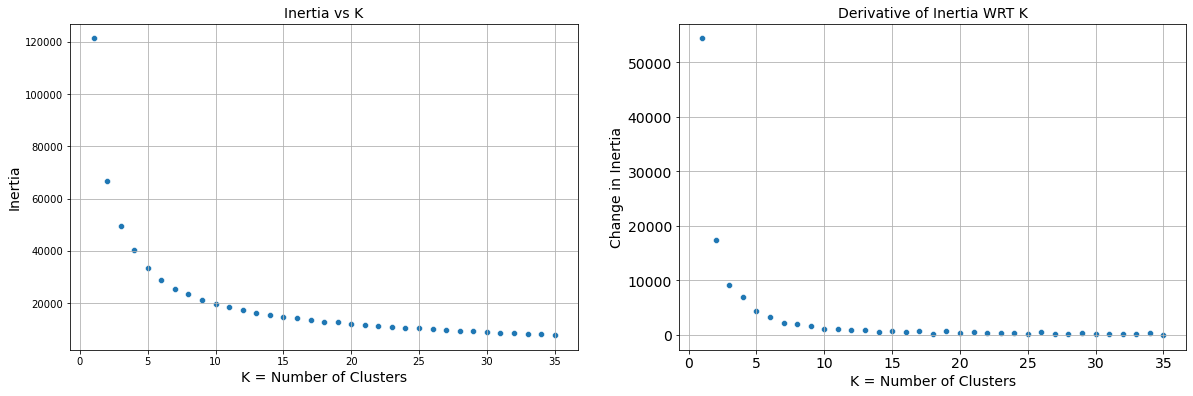

In [7]:
elementkeys = list(paid_demand_dict.keys())
for i,ekey in enumerate(elementkeys):
    for j,date in enumerate(paid_demand_dict[ekey]):
        if j==0:
            pd_matrix = np.array(paid_demand_dict[ekey][date])
        else:
            pd_matrix = np.vstack((pd_matrix,paid_demand_dict[ekey][date]))
    pd_vect = np.mean(pd_matrix.reshape((-1,13)), axis=0)
    if i==0:
        pd_avg = pd_vect
    else:
        pd_avg = np.vstack((pd_avg,pd_vect))

inertia_pd = []
max_k = 35

for i in trange(1, max_k+1):
    km_pd = KMeans(n_clusters=i).fit(pd_avg)
    inertia_pd.append(km_pd.inertia_)
    
plot_inertia(inertia_pd)

km_pd = KMeans(n_clusters=num_clusters).fit(pd_avg)
pd_clust_dict = {}
for i,ekey in enumerate(elementkeys):
    pd_clust_dict[ekey] = km_pd.labels_[i]

# Occupancy Clustering

100%|███████████████████████████████████████████| 35/35 [00:03<00:00,  9.97it/s]


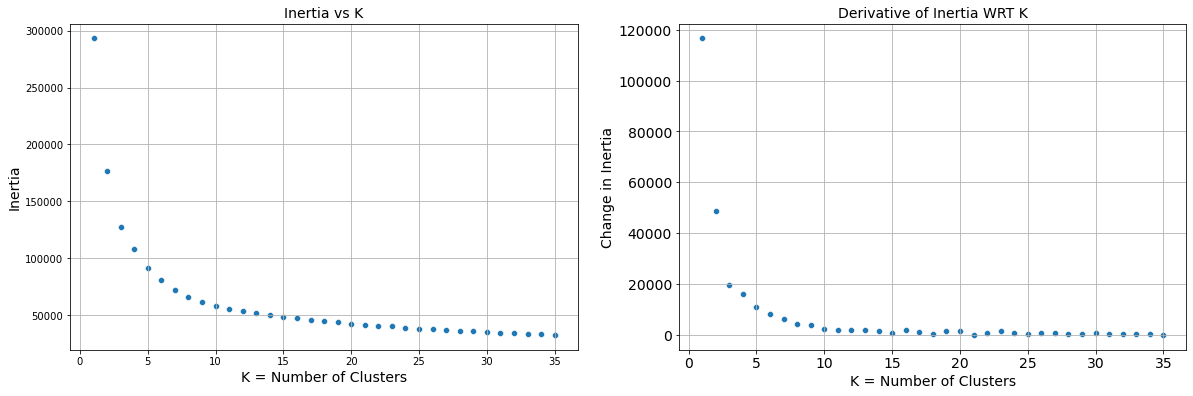

In [8]:
elementkeys = list(occ_dict.keys())
for i,ekey in enumerate(elementkeys):
    for j,date in enumerate(occ_dict[ekey]):
        if j==0:
            occ_matrix = np.array(occ_dict[ekey][date])
        else:
            occ_matrix = np.vstack((occ_matrix,occ_dict[ekey][date]))
    occ_vect = np.mean(occ_matrix.reshape((-1,13)), axis=0)
    if i==0:
        occ_avg = occ_vect
    else:
        occ_avg = np.vstack((occ_avg,occ_vect))

inertia_occ = []
max_k = 35

for i in trange(1, max_k+1):
    km_occ = KMeans(n_clusters=i).fit(occ_avg)
    inertia_occ.append(km_occ.inertia_)
    
plot_inertia(inertia_occ)

km_occ = KMeans(n_clusters=num_clusters).fit(occ_avg)
occ_clust_dict = {}
for i,ekey in enumerate(elementkeys):
    occ_clust_dict[ekey] = km_occ.labels_[i]

In [16]:
clust_df = pd.DataFrame({'ElementKey':all_ekeys})
clust_df['PaidDemandCluster'] = clust_df.apply(lambda r: pd_clust_dict.get(r['ElementKey'],-1), axis=1)
clust_df['OccupancyCluster'] = clust_df.apply(lambda r: occ_clust_dict.get(r['ElementKey'],-1), axis=1)
clust_df['PaidDemandCorrCluster'] = clust_df.apply(lambda r: pd_corr_clust_dict.get(r['ElementKey'],-1), axis=1)
clust_df['OccupancyCorrCluster'] = clust_df.apply(lambda r: occ_corr_clust_dict.get(r['ElementKey'],-1), axis=1)
clust_df[clust_df.OccupancyCorrCluster==5]

,ElementKey,PaidDemandCluster,OccupancyCluster,PaidDemandCorrCluster,OccupancyCorrCluster
3,13098,19,12,2,5
77,53433,24,4,30,5
85,81114,29,12,3,5
89,57194,12,4,3,5
96,36142,12,0,17,5
179,58226,29,12,30,5
206,8005,24,4,3,5
254,8394,29,12,3,5
285,79890,12,0,3,5
330,8393,19,30,11,5
